# Visualization

## Topics
1. Matplotlib core framework
2. Pandas plot()
3. Seaborn statistical visualization
4. (not covered) Grammar of graphics (ggplot2 see plotnine )
5. (not covered) Interactive plotting

## Resources
1. Ch 9 in Python for Data Analysis, 2nd Ed, Wes McKinney (UCalgary library and https://github.com/wesm/pydata-book)
2. Ch 4 in Python Data Science Handbook, Jake VanderPlas (Ucalgary library and https://github.com/jakevdp/PythonDataScienceHandbook)
3. Fundamentals of Data Visualization, Claus O. Wilke (Ucalgary library and https://serialmentor.com/dataviz/index.html)
4. Overview by Jake VanderPlas https://www.youtube.com/watch?v=FytuB8nFHPQ


## Matplotlib
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
Matplotlib tries to make easy things easy and hard things possible.  
For simple plotting the pyplot module provides a MATLAB-like interface

https://matplotlib.org

Importing matplotlib looks like this

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


### Two interfaces
There are two ways to interact with Matplot lib: a Matlab style and an object oriented style interface.

See Ch 4 in Python Data Science Handbook, Jake VanderPlas

- Two Interfaces for the Price of One, pp. 222
- Matplotlib Gotchas, pp. 232

### Matlab style interface

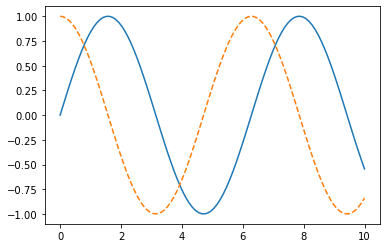

In [2]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

Adding decorations to the plot is done by repeatatly calling functions on the imported `plt` module. All calls within the cell will be applied to the current figure and axes.

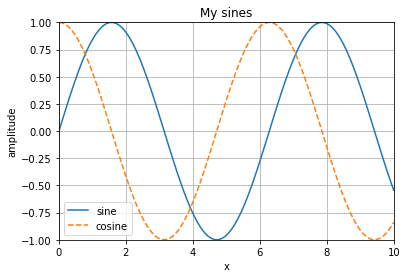

In [3]:
plt.plot(x, np.sin(x), '-', label='sine')
plt.plot(x, np.cos(x), '--', label ='cosine')

plt.xlim([0, 10])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('amplitude')
plt.title('My sines')
plt.grid()
plt.legend();

### Object oriented interface 

With this interface, you first create a figure and an axes object, then call their methods to change the plot.

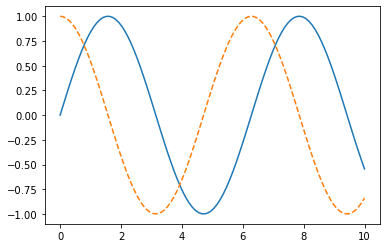

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-')
ax.plot(x, np.cos(x), '--');

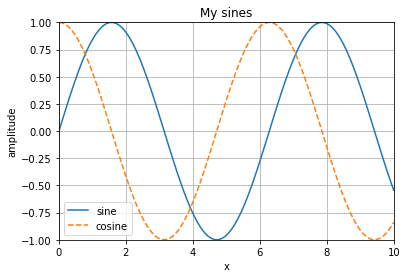

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-', label='sine')
ax.plot(x, np.cos(x), '--', label ='cosine')

ax.set(xlim=[0, 10], ylim=[-1, 1],
       xlabel='x', ylabel='amplitude',
       title='My sines');
ax.grid()
ax.legend();

### Save to file 
With the figure object at hand, we can save to file

In [6]:
fig.savefig('sines.pdf')

In [7]:
!ls *.pdf

sines.pdf


## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Let's load the heart attack dataset

In [3]:
data = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])

Plotting all columns, works, but does not provide a lot of insight.

<AxesSubplot:>

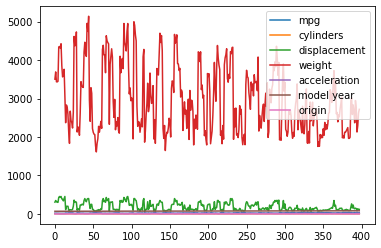

In [4]:
data.plot()

Let's look at the age distribution (a histogram)

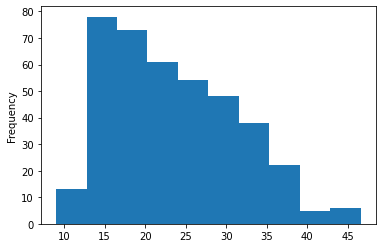

In [5]:
data['mpg'].plot.hist();

How many male and female samples do we have?

In [6]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

Notice that we accessed the gender column with dot notation. This can be done whenever the column name is 'nice' enough to be a python variable name.

Do we have similar ages in females and males?  
Plotting two histograms for each gender side beside directly form the dataframe:

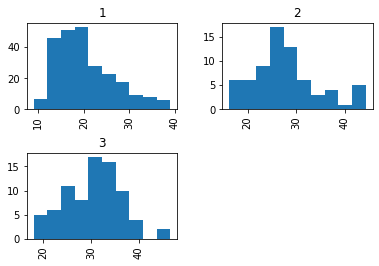

In [7]:
axs = data.hist(column='mpg', by='origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

Is age and blood pressure correlated? Maybe it is different for females and males?  
Let's have a look with a scatter plot.

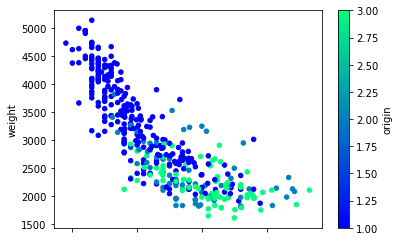

In [12]:
data.plot.scatter('mpg', 'weight', c='origin', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

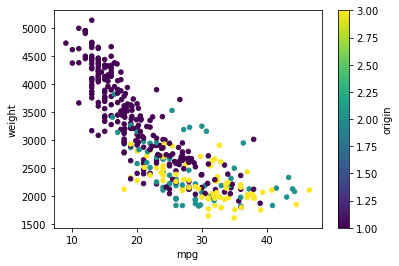

In [11]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'weight', c='origin', colormap='viridis', ax=ax);

It is a bit annoying that there is a colorbar, we know gender is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

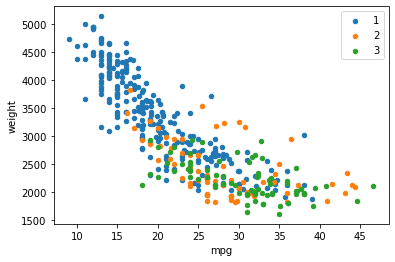

In [15]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'weight', c=colors[key], label=key, ax=ax);

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [16]:
import seaborn as sns

Let's re-create the histograms by gender with seaborn with the figure level `displot()` function.

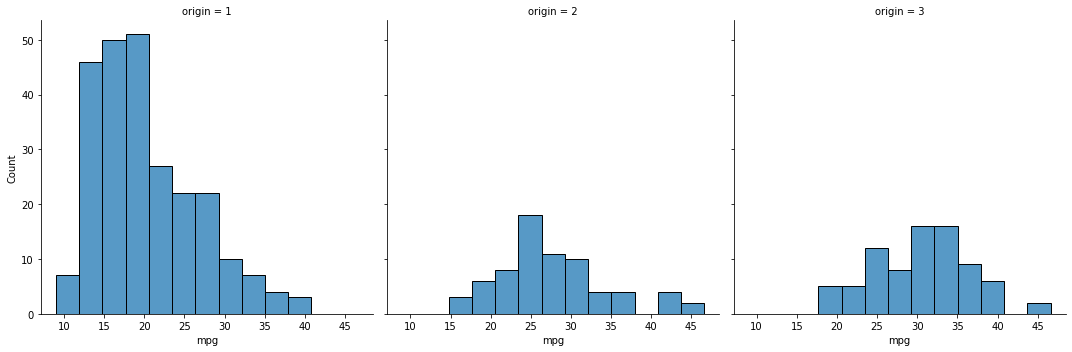

In [17]:
# Use gender to split age into columns
sns.displot(x='mpg', col='origin', data=data);

We can display the counts in the same plot, one on top of the other.

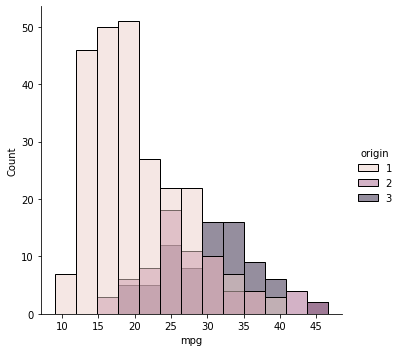

In [18]:
# Use gender to color (hue) in the same plot
sns.displot(x='mpg', hue='origin', data=data);

To have an idea of the split between male and female, we can stack the counts, adding up to total.

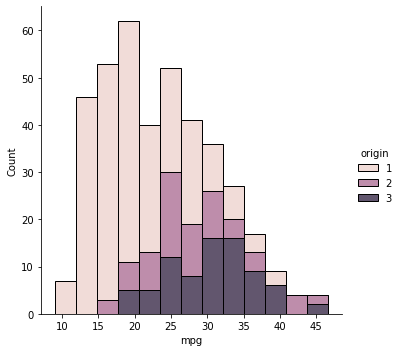

In [19]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack');

We can look at the differences in ages with a boxplot too

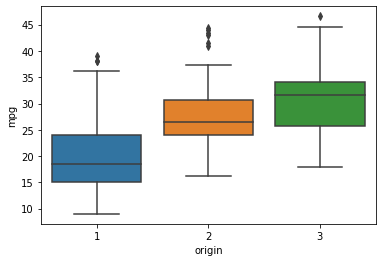

In [21]:
sns.boxplot(x='origin', y='mpg', data=data);

Let's re-create the scatter plot to see if age and blood pressure are correlated by gender.

To make the legend show strings we will create a gender string column with female and male strings rather than 0 and 1.

In [34]:
data['origin_str'] = data['origin'].replace([1, 2, 3], ['1', '2', '3'])

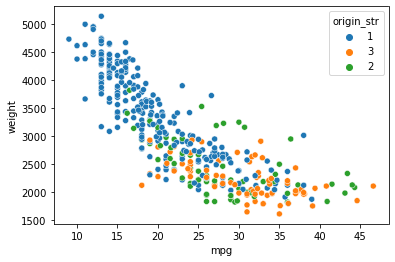

In [35]:
ax = sns.scatterplot(x='mpg', y='weight', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

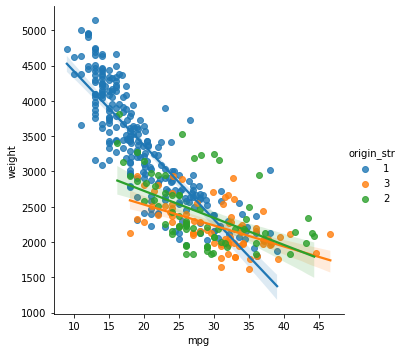

In [36]:
ax = sns.lmplot(x='mpg', y='weight', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

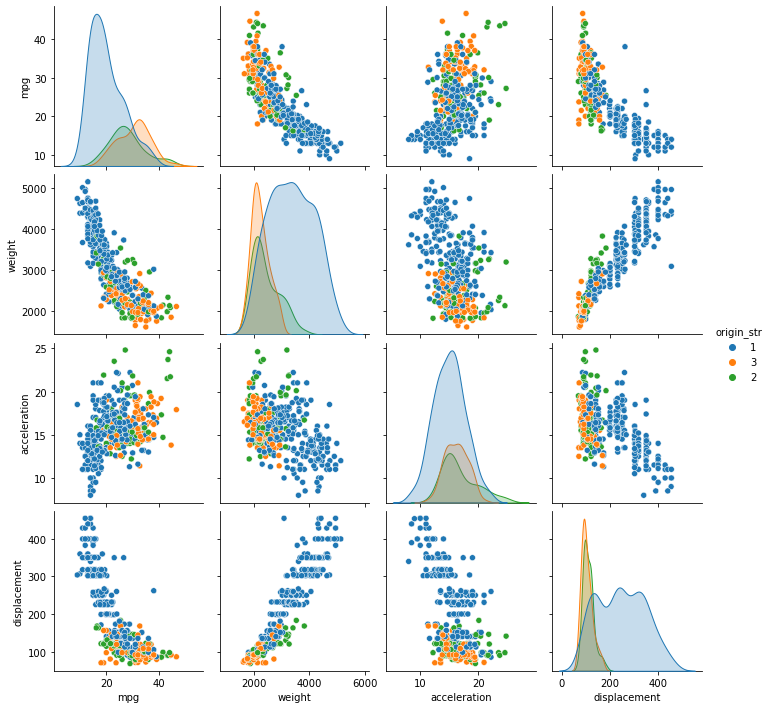

In [48]:
sns.pairplot(data, vars=['mpg', 'weight', 'acceleration', 'displacement'], hue='origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

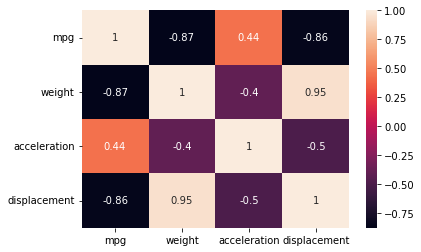

In [47]:
g = sns.heatmap(data[['mpg', 'weight', 'acceleration', 'displacement']].corr(method='spearman'), 
            annot=True)

There are nice tutorials on the Seaborn website, be sure to check these out.